# Compute multi-model ensemble (NHP1.0)
10th, 50th and 90th percentiles output in a single file.

In [27]:
import xarray as xr
import numpy as np
import lib_david
from datetime import datetime

In [3]:
#< Search parameters to filter files included in the MME
root_dir = "/g/data/ia39/ncra/drought_aridity/ai/" # replace with official delivery dir
index = "AI-atmospheric"
index_short = "AI"
gwl = "GWL12" # ["GWL12","GWL15","GWL20","GWL30"]
data_type = "2D"
rcp = "rcp85"
mme_set = ["model","bc"]
quantiles = [0.1, 0.5, 0.9]

# file_out_name =(f"{root_dir}{index}_{data_type}_{gwl}")

### Compute quantiles across models, bc-methods and rcps/ssps (if appliccable)
Upper:  90th percentile = 0.9
Median: 50th percentile = 0.5
Lower:  10th percentile = 0.1

In [4]:
#< Get files from root directory
files = lib_david.get_file_paths(root_dir,".nc",include=[index,gwl,rcp,data_type])
for file in files:
    print(file)
    
# Open files and split file strings for dimension names and add to list from which they are merged across the dimensions specified
da_list = []
for file in files:
    model = file.split('_')[3]
    bc = file.split('_')[-3]
    rcp = file.split('_')[4]
    gwl = file.split('_')[-1][:-3]

    print('Model: '+model, 'BC: '+bc, 'RCP: '+rcp, 'GWL: '+gwl)
    
    da = xr.open_dataset(file)['AI']
    da = da.expand_dims(dim={"model": [model],"bc": [bc],"rcp": [rcp],"gwl": [gwl]}, axis=[0,1,2,3])
    da_list.append(da)

# Merge data arrays and print output
da_all = xr.merge(da_list)
print(da_all)

/g/data/ia39/ncra/drought_aridity/ai/AI-atmospheric-based_NHP1-AUS-5_CNRM-CM5_rcp85_r1i1p1_r240x120-QME_2D_GWL12.nc
/g/data/ia39/ncra/drought_aridity/ai/AI-atmospheric-based_NHP1-AUS-5_ACCESS1-0_rcp85_r1i1p1_CSIRO-CCAM-r3355-r240x120-ISIMIP2b_2D_GWL12.nc
/g/data/ia39/ncra/drought_aridity/ai/AI-atmospheric-based_NHP1-AUS-5_CNRM-CM5_rcp85_r1i1p1_r240x120-MRNBC_2D_GWL12.nc
/g/data/ia39/ncra/drought_aridity/ai/AI-atmospheric-based_NHP1-AUS-5_ACCESS1-0_rcp85_r1i1p1__r240x120-ISIMIP2b_2D_GWL12.nc
/g/data/ia39/ncra/drought_aridity/ai/AI-atmospheric-based_NHP1-AUS-5_ACCESS1-0_rcp85_r1i1p1_r240x120-MRNBC_2D_GWL12.nc
/g/data/ia39/ncra/drought_aridity/ai/AI-atmospheric-based_NHP1-AUS-5_CNRM-CM5_rcp85_r1i1p1_CSIRO-CCAM-r3355-r240x120-ISIMIP2b_2D_GWL12.nc
/g/data/ia39/ncra/drought_aridity/ai/AI-atmospheric-based_NHP1-AUS-5_GFDL-ESM2M_rcp85_r1i1p1_CSIRO-CCAM-r3355-r240x120-ISIMIP2b_2D_GWL12.nc
/g/data/ia39/ncra/drought_aridity/ai/AI-atmospheric-based_NHP1-AUS-5_GFDL-ESM2M_rcp85_r1i1p1_r240x120-QME_2

In [ ]:
#< Compute quantiles
quantiles = da_all.quantile([0.1,0.5,0.9], dim = mme_set).squeeze()
now = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

# Print date and time in the format YYYY-MM-DD HH:MM:SS
#< attach attributes
quantiles.attrs['description'] = f'AI = Ratio of precipitation to (potential)evepotranspiration produced from National Hydrological Projections (NHP1.0) on /g/data/wj02/COMPLIANT_PUBLISHED/. Produced for ACS. '
quantiles.attrs['method']  = 'Using atmospheric-based aridity: pr/e0'
quantiles.attrs['history'] = f"Created on {now}" #cmdprov.new_log(extra_notes=[get_git_hash()])
quantiles.attrs['comment'] = f"Using data on {root_dir}"
quantiles.attrs['models'] = ', '.join(map(str, da_all['model'].data))
quantiles.attrs['GWL'] = f"GWL {float(gwl[-2:])/10}"
quantiles.attrs['RCP'] = f"RCP{float(rcp[-2:])/10}"
quantiles.attrs['bias-correction methods'] = ', '.join(map(str, da_all['bc'].data))
quantiles.attrs['cell_methods'] = "quantile: 0.1, 0.5, 0.9"
quantiles.to_netcdf(f"{root_dir}AI-atmospheric-based_NHP1-AUS-5_{rcp}_bias-adjusted_2D_{gwl}_percentiles10-50-90.nc")

### Plot and check for feasible outcome

In [ ]:
#< Aridity Index (AI):
quantiles_ds = xr.open_dataset(f"{root_dir}AI-atmospheric-based_NHP1-AUS-5_{rcp}_bias-adjusted_2D_GWL12_percentiles10-50-90.nc")
quantiles_ds.AI.plot(col="quantile", levels=[0,0.05,0.2,0.5,5])

In [ ]:
#< Aridity Index (AI):
quantiles_ds = xr.open_dataset(f"{root_dir}AI-atmospheric-based_NHP1-AUS-5_{rcp}_bias-adjusted_2D_GWL15_percentiles10-50-90.nc")
quantiles_ds.AI.plot(col="quantile", levels=[0,0.05,0.2,0.5,5])

In [ ]:
#< Aridity Index (AI):
quantiles_ds = xr.open_dataset(f"{root_dir}AI-atmospheric-based_NHP1-AUS-5_{rcp}_bias-adjusted_2D_GWL20_percentiles10-50-90.nc")
quantiles_ds.AI.plot(col="quantile", levels=[0,0.05,0.2,0.5,5])

In [ ]:
#< Aridity Index (AI):
quantiles_ds = xr.open_dataset(f"{root_dir}AI-atmospheric-based_NHP1-AUS-5_{rcp}_bias-adjusted_2D_GWL30_percentiles10-50-90.nc")
quantiles_ds.AI.plot(col="quantile", levels=[0,0.05,0.2,0.5,5])

## Compute MME change

In [5]:
#< Import and open pickle file containing models and GWLs to determine matches
import pickle

# Specify the path to your .pkl file
file_path = '/g/data/mn51/users/dh4185/hazards-drought/gwl_years.pkl'

# Open the file in binary read mode
with open(file_path, 'rb') as file:
    # Load the data from the file
    models_gwl = pickle.load(file)


In [21]:
#< Get files from root directory
gwls = ["GWL15","GWL20","GWL30"]
bc_methods = ["r240x120-QME","CSIRO-CCAM-r3355-r240x120-ISIMIP2b","_r240x120-ISIMIP2b","r240x120-MRNBC"]

#< iterate through GWLs 1.5, 2.0, 3.0
for _gwl in gwls:
    #< Create an empty list to store difference to GWL12
    da_diff_list = []
    
    #< iterate through models
    for model in models_gwl:
        
        #< iterate through bc-methods
        for bc in bc_methods:
            
            #< get GWL12 file as reference
            file_gwl12 = lib_david.get_file_paths(root_dir,".nc",include=[index,"GWL12",model,bc,rcp,data_type],exclude=["percentiles"])
            # print(f"GWL1.2 file: {file_gwl12}")
            
            #< ensure there's only one possible file
            if len(file_gwl12)==1:
                da_gwl12 = xr.open_mfdataset(file_gwl12)#[index_short]
            else:
                print(f"There are {len(file_gwl12)} files in the list. Too many to continue.")
                break
        
            print(f"Getting files for {model}, {bc} and {_gwl}")
            file = lib_david.get_file_paths(root_dir,".nc",include=[index,rcp,data_type,model,bc,_gwl],exclude=["percentiles"])
            # print(f"Found: {file}")
            #< ensure there's only one possible file
            if len(file)==1:
                da_gwl = xr.open_mfdataset(file)#[index_short]
            else:
                print(f"There are {len(file)} files in the list. Too many to continue.")
                break
            #< calculate difference: GWL12-GWLx
            diff_da = da_gwl12-da_gwl
            diff_da.attrs = da_gwl.attrs
            # print(diff_da)
            # diff_da.to_netcdf
    
            diff_da = diff_da.expand_dims(dim={"model": [model],"bc": [bc],"rcp": [rcp],"gwl": [gwl]}, axis=[0,1,2,3])
            da_diff_list.append(diff_da)
    
    # Merge data arrays and print output
    da_diff_all = xr.merge(da_diff_list).squeeze()

    #< Compute quantiles
    quantiles_diff = da_diff_all.quantile([0.1,0.5,0.9], dim = mme_set).squeeze()
    now = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    
    # Print date and time in the format YYYY-MM-DD HH:MM:SS
    #< attach attributes
    quantiles_diff.attrs['description'] = f'Change of AI at GWL {float(_gwl[-2:])/10} to GWL 1.2 (GWL 1.2 - GWL {float(_gwl[-2:])/10}). AI = Ratio of precipitation to (potential)evepotranspiration produced from National Hydrological Projections (NHP1.0) on /g/data/wj02/COMPLIANT_PUBLISHED/. Produced for ACS. '
    quantiles_diff.attrs['method']  = 'Using atmospheric-based aridity: pr/e0'
    quantiles_diff.attrs['history'] = f"Created on {now}" #cmdprov.new_log(extra_notes=[get_git_hash()])
    quantiles_diff.attrs['comment'] = f"Using data on {root_dir}"
    quantiles_diff.attrs['models'] = ', '.join(map(str, da_all['model'].data))
    quantiles_diff.attrs['GWL'] = f"GWL {float(_gwl[-2:])/10}"
    quantiles_diff.attrs['RCP'] = f"RCP{float(rcp[-2:])/10}"
    quantiles_diff.attrs['bias-correction methods'] = ', '.join(map(str, da_all['bc'].data))
    quantiles_diff.attrs['cell_methods'] = "quantile: 0.1, 0.5, 0.9"
    quantiles_diff.to_netcdf(f"{root_dir}AI-atmospheric-based_NHP1-AUS-5_{rcp}_bias-adjusted_2D_{_gwl}_change-to-GWL12_percentiles10-50-90.nc")
    print(quantiles_diff)
            


Getting files for ACCESS1-0, r240x120-QME and GWL15
Getting files for ACCESS1-0, CSIRO-CCAM-r3355-r240x120-ISIMIP2b and GWL15
Getting files for ACCESS1-0, _r240x120-ISIMIP2b and GWL15
Getting files for ACCESS1-0, r240x120-MRNBC and GWL15
Getting files for GFDL-ESM2M, r240x120-QME and GWL15
Getting files for GFDL-ESM2M, CSIRO-CCAM-r3355-r240x120-ISIMIP2b and GWL15
Getting files for GFDL-ESM2M, _r240x120-ISIMIP2b and GWL15
Getting files for GFDL-ESM2M, r240x120-MRNBC and GWL15
Getting files for MIROC5, r240x120-QME and GWL15
Getting files for MIROC5, CSIRO-CCAM-r3355-r240x120-ISIMIP2b and GWL15
Getting files for MIROC5, _r240x120-ISIMIP2b and GWL15
Getting files for MIROC5, r240x120-MRNBC and GWL15
Getting files for CNRM-CM5, r240x120-QME and GWL15
Getting files for CNRM-CM5, CSIRO-CCAM-r3355-r240x120-ISIMIP2b and GWL15
Getting files for CNRM-CM5, _r240x120-ISIMIP2b and GWL15
Getting files for CNRM-CM5, r240x120-MRNBC and GWL15
<xarray.Dataset> Size: 14MB
Dimensions:   (lon: 841, lat: 68

In [22]:
### Plot and check for feasible outcome

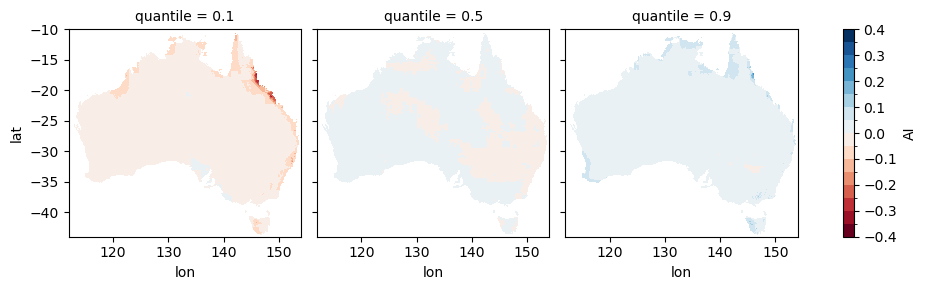

In [33]:
#< Aridity Index (AI):
quantiles_ds = xr.open_dataset(f"{root_dir}AI-atmospheric-based_NHP1-AUS-5_{rcp}_bias-adjusted_2D_GWL15_change-to-GWL12_percentiles10-50-90.nc")
quantiles_ds.AI.plot(col="quantile",cmap="RdBu", levels=np.arange(-0.4, 0.45, 0.05))

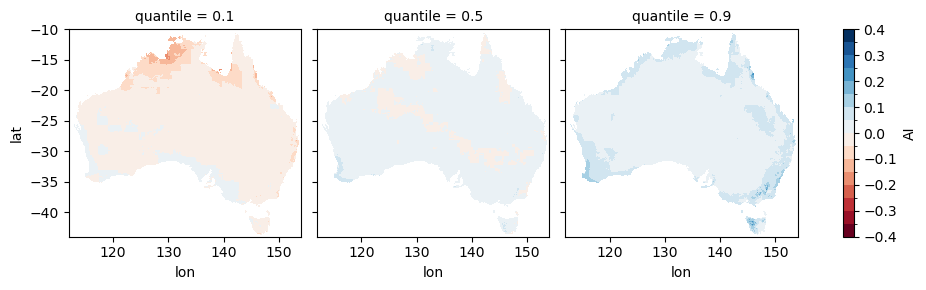

In [31]:
#< Aridity Index (AI):
quantiles_ds = xr.open_dataset(f"{root_dir}AI-atmospheric-based_NHP1-AUS-5_{rcp}_bias-adjusted_2D_GWL20_change-to-GWL12_percentiles10-50-90.nc")
quantiles_ds.AI.plot(col="quantile",cmap="RdBu", levels=np.arange(-0.4, 0.45, 0.05))

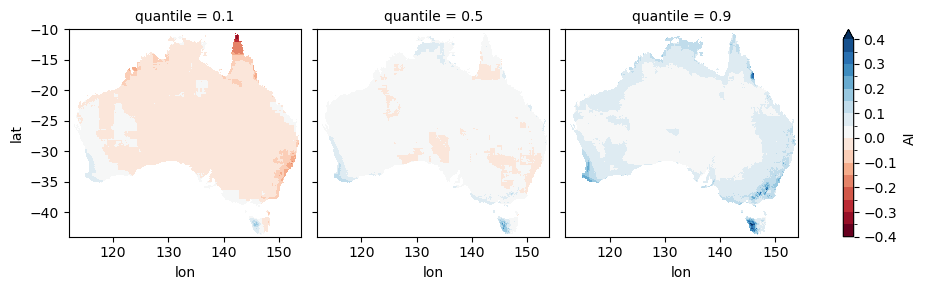

In [32]:
#< Aridity Index (AI):
quantiles_ds = xr.open_dataset(f"{root_dir}AI-atmospheric-based_NHP1-AUS-5_{rcp}_bias-adjusted_2D_GWL30_change-to-GWL12_percentiles10-50-90.nc")
quantiles_ds.AI.plot(col="quantile",cmap="RdBu", levels=np.arange(-0.4, 0.45, 0.05))

# Test categorie change

In [34]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Define AI categories with threshold values
ai_categories = {
    'Hyper-Arid': (-np.inf, 0.05),
    'Arid': (0.05, 0.2),
    'Semi-Arid': (0.2, 0.5),
    'Dry Sub-Humid': (0.5, 0.65),
    'Humid': (0.65, np.inf)
}

# Create a dictionary to map AI values to category names
ai_category_labels = list(ai_categories.keys())
ai_category_thresholds = list(ai_categories.values())

In [37]:
# Classify AI Values into Categories
def classify_ai(ai_value):
    for category, (lower, upper) in ai_categories.items():
        if lower <= ai_value < upper:
            return category
    return np.nan

# Load your datasets
ai_gwl12 = xr.open_dataset(f"{root_dir}AI-atmospheric-based_NHP1-AUS-5_CNRM-CM5_rcp85_r1i1p1_CSIRO-CCAM-r3355-r240x120-ISIMIP2b_2D_GWL12.nc")
ai_gwl30 = xr.open_dataset(f"{root_dir}AI-atmospheric-based_NHP1-AUS-5_CNRM-CM5_rcp85_r1i1p1_CSIRO-CCAM-r3355-r240x120-ISIMIP2b_2D_GWL30.nc")

# Classify the AI values
classified_ai_gwl12 = xr.apply_ufunc(
    np.vectorize(classify_ai),
    ai_gwl12,
    vectorize=True,
    dask="allowed",
    output_dtypes=[str]
)

classified_ai_gwl30 = xr.apply_ufunc(
    np.vectorize(classify_ai),
    ai_gwl30,
    vectorize=True,
    dask="allowed",
    output_dtypes=[str]
)

In [39]:
# Compute Category Changes
change_map = xr.apply_ufunc(
    np.vectorize(lambda x, y: f"{x} -> {y}"),
    classified_ai_gwl12,
    classified_ai_gwl30,
    vectorize=True,
    dask="allowed",
    output_dtypes=[str]
)

In [63]:
change_var

<xarray.DataArray 'AI' (lat: 681, lon: 841)> Size: 69MB
array([['nan -> nan', 'nan -> nan', 'nan -> nan', ..., 'nan -> nan',
        'nan -> nan', 'nan -> nan'],
       ['nan -> nan', 'nan -> nan', 'nan -> nan', ..., 'nan -> nan',
        'nan -> nan', 'nan -> nan'],
       ['nan -> nan', 'nan -> nan', 'nan -> nan', ..., 'nan -> nan',
        'nan -> nan', 'nan -> nan'],
       ...,
       ['nan -> nan', 'nan -> nan', 'nan -> nan', ..., 'nan -> nan',
        'nan -> nan', 'nan -> nan'],
       ['nan -> nan', 'nan -> nan', 'nan -> nan', ..., 'nan -> nan',
        'nan -> nan', 'nan -> nan'],
       ['nan -> nan', 'nan -> nan', 'nan -> nan', ..., 'nan -> nan',
        'nan -> nan', 'nan -> nan']], dtype='<U30')
Coordinates:
  * lon      (lon) float64 7kB 112.0 112.0 112.1 112.2 ... 153.9 153.9 154.0
  * lat      (lat) float64 5kB -44.0 -43.95 -43.9 -43.85 ... -10.1 -10.05 -10.0

In [66]:
type(change_colors_flat)

tuple

In [64]:
# Plot change
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import numpy as np
import xarray as xr

# Assuming change_map is a Dataset with 'AI' as a variable
change_var = change_map['AI']

# Get unique changes in the change_var
unique_changes = np.unique(change_var)

# Create a colormap for the unique changes
cmap = plt.get_cmap('tab20', len(unique_changes))
norm = mcolors.BoundaryNorm(np.arange(len(unique_changes) + 1), cmap.N)

# Create a dictionary to map changes to colors
change_to_color = {change: cmap(i) for i, change in enumerate(unique_changes)}

# Map the colors to the change_var values
change_colors_flat = np.vectorize(change_to_color.get)(change_var)

# Convert change_colors_flat to DataArray to retain xarray's functionality
change_colors = xr.DataArray(change_colors_flat,
                             dims=('lat', 'lon'),  # Assuming 'lat' and 'lon' are dimensions
                             coords={'lat': change_var['lat'], 'lon': change_var['lon']})

# Plot
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()
im = change_colors.plot.imshow(transform=ccrs.PlateCarree(), interpolation='none', cmap=cmap, norm=norm)

# Create a colorbar with the unique changes as ticks
cbar = plt.colorbar(im, ax=ax, ticks=np.arange(len(unique_changes)), boundaries=np.arange(len(unique_changes) + 1))
cbar.ax.set_yticklabels(unique_changes)

plt.show()








ValueError: different number of dimensions on data and dims: 0 vs 2